# Anomaly Detection

Anomaly detection algorithms look at an unlabeled dataset and can learn from that dataset
to raise a flag if there are any unusual or anomalous data points detected in the future.

These would be data points that fall, in some sense, far outside the "average" of the dataset.

Suppose that we are building aircraft engines or inspecting them, and we want to determine
if any of them are faulty.  Naturally, we want our aircraft engines to be extremely reliable
because aircraft engines that fail typically lead to very bad things happening.  So we would
want to detect any manufacturing defects in an engine before it's put into an airplane.

Imagine we have the following features about an aircraft engine.  Once an engine is built,
we test it for the heat it generates and the intensity of the vibrations that it generates.

$x_1$ = heat generated

$x_2$ = vibration intensity

In a real world situation, we would no doubt measure many more features of our aircraft engines.
But to make life easier, we're just going to work with these two features for learning
about this algorithm.

Assume we are given a data set of engines that we know are good (don't have any anomalies):

$\{ x^{(1)}, x^{(2)}, \ldots, x^{(m)} \}$

And then suppose a new engine rolls off the assembly line and has a set of properties represented
by $x_{test}$.  We'd like to know if this new engine looks similar to ones that have already 
been manufactured (and that we know are "good") and so is probably ok, or if maybe there was a 
defect in the manufacturing process.  

Here's how an anomaly detection algorithm works. 

Let's plot our feature vectors in a 2-dimensional space, where each dot represents one of our
engines that we know are good.

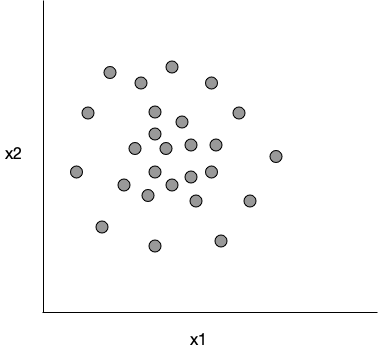

And then we can plot where this new point $x_{test}$ is as well. 

If $x_{test}$ happens to be here (the red point):

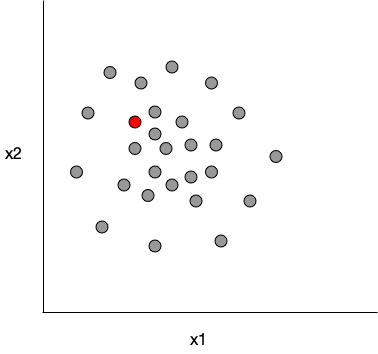
 
then it's probably fine.

But what if  $x_{test}$ happens to be here (the red point):

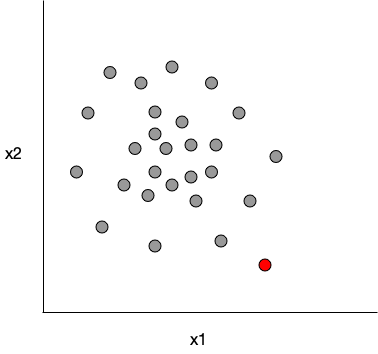

Now this is less clear.  This red point seems outside the "main area" of
points where we know the engines are good, but is it far enough outside
to really be anomalous?


What we're going to do is develop a probabilistic model to estimate the probability
that each dot is anomalous or not.  If you've never taken a course in probability,
the idea here is that we're going to come up with an algorithm that can generate a bunch of 
these gray dots above.  And then we ask ourselves, "What is the chance that the red dot was
generated by this same algorithm?"  If that's a low probability, we would call the red dot an anomaly.

## Gaussian (normal) distribution

A little about probability distributions:

When we generate random numbers in programming languages, using built-in functions like `rand()`
or `random.randint()`, the numbers are usually generated according to a **uniform distribution**.
What that means is that each number is equally likely to be generated.  For example, the 6 numbers
on a fair die have a uniform probability distribution because each one is equally likely to come up
(chance = 1/6).  When I ask Python or Java to generate a random number between 1 and 10, each number
is equally likely to come up (chance = 1/10).  

Another way to look at this is the *probability* of any number being generated is equal
to the probability of any other number being generated.

The normal distribution, or Gaussian distribution, works a bit differently.  If you pick random
numbers according to a normal distribution, some numbers will be more likely to come up than
others.  

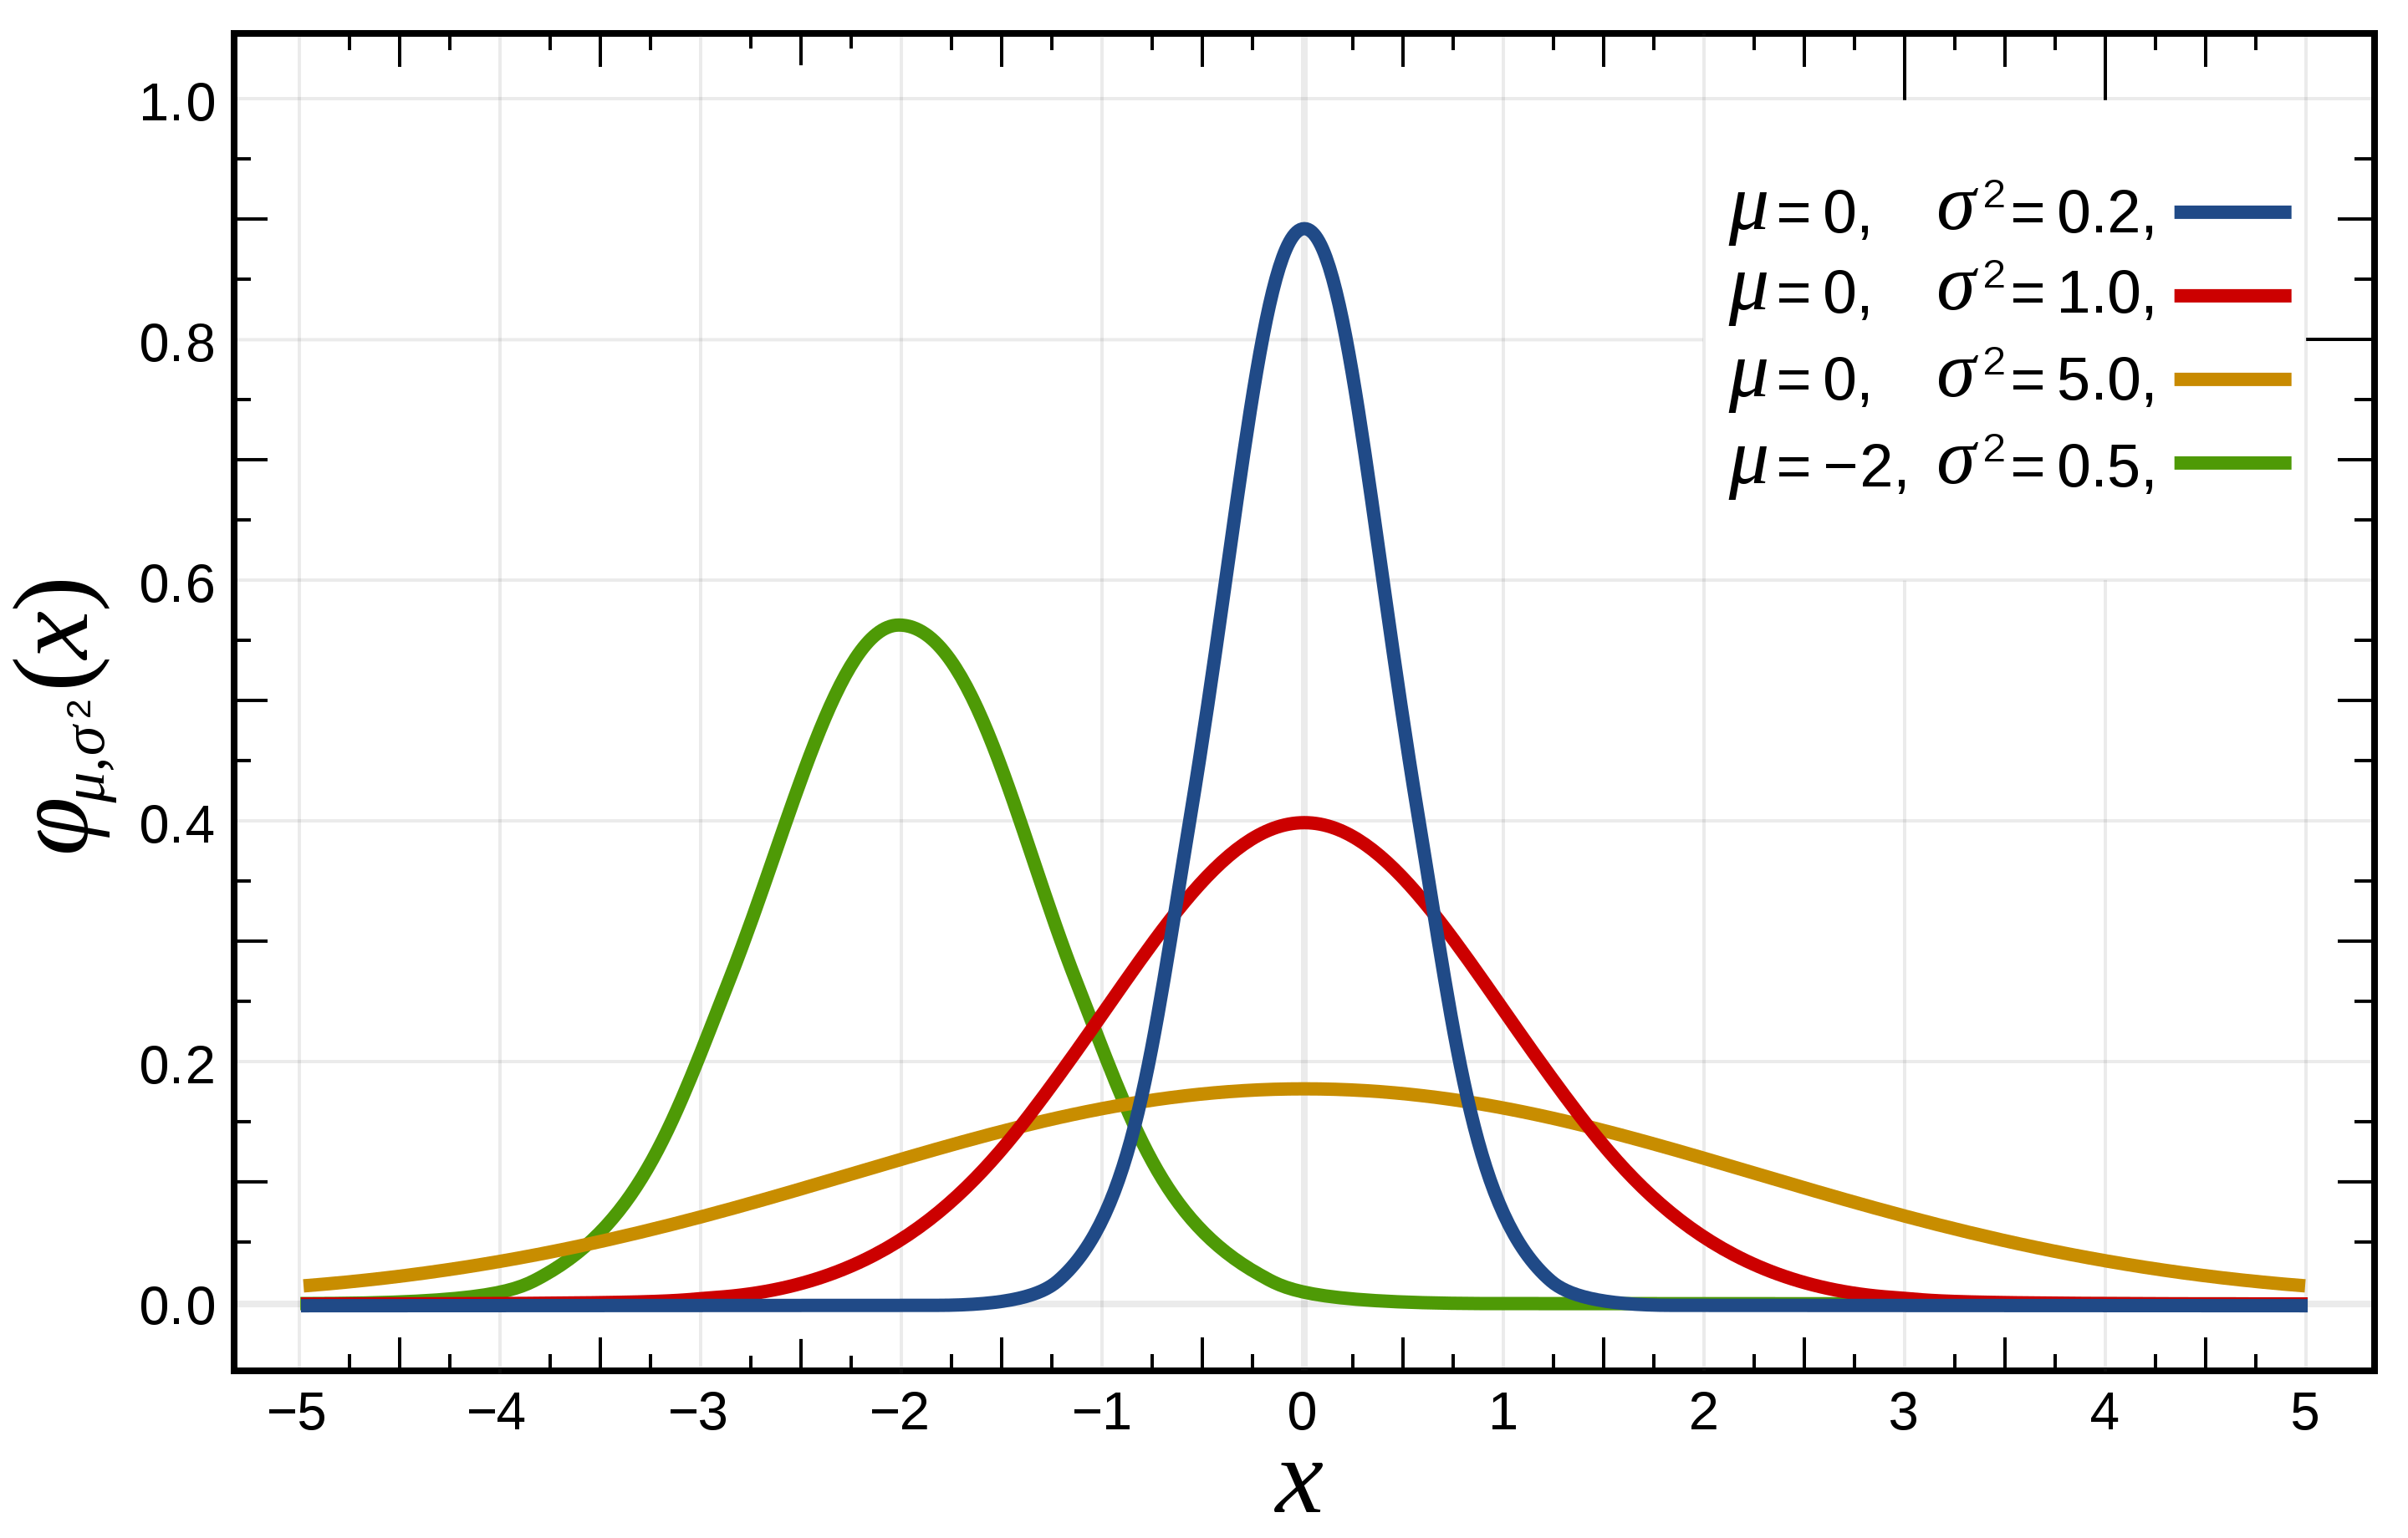

Many natural phenomena follow normal distributions (e.g., human height).

The two parameters that control the normal distribution are the **mean** $\mu$ and the variance
$\sigma^2$.  The mean controls where the peak of the distribution is and the variance controls how
spread out the distribution is (how "pointy" or "flat" the peak is).  Sometimes the distribution is
described in terms of standard deviation ($\sigma$) instead of variance $\sigma^2$.

For instance, the heights of adult men in the United States are approximately normally distributed with a mean of 70 inches and a standard deviation of 3 inches. Heights of adult women are approximately normally distributed with a mean of 64.5 inches and a standard deviation of 2.5 inches.

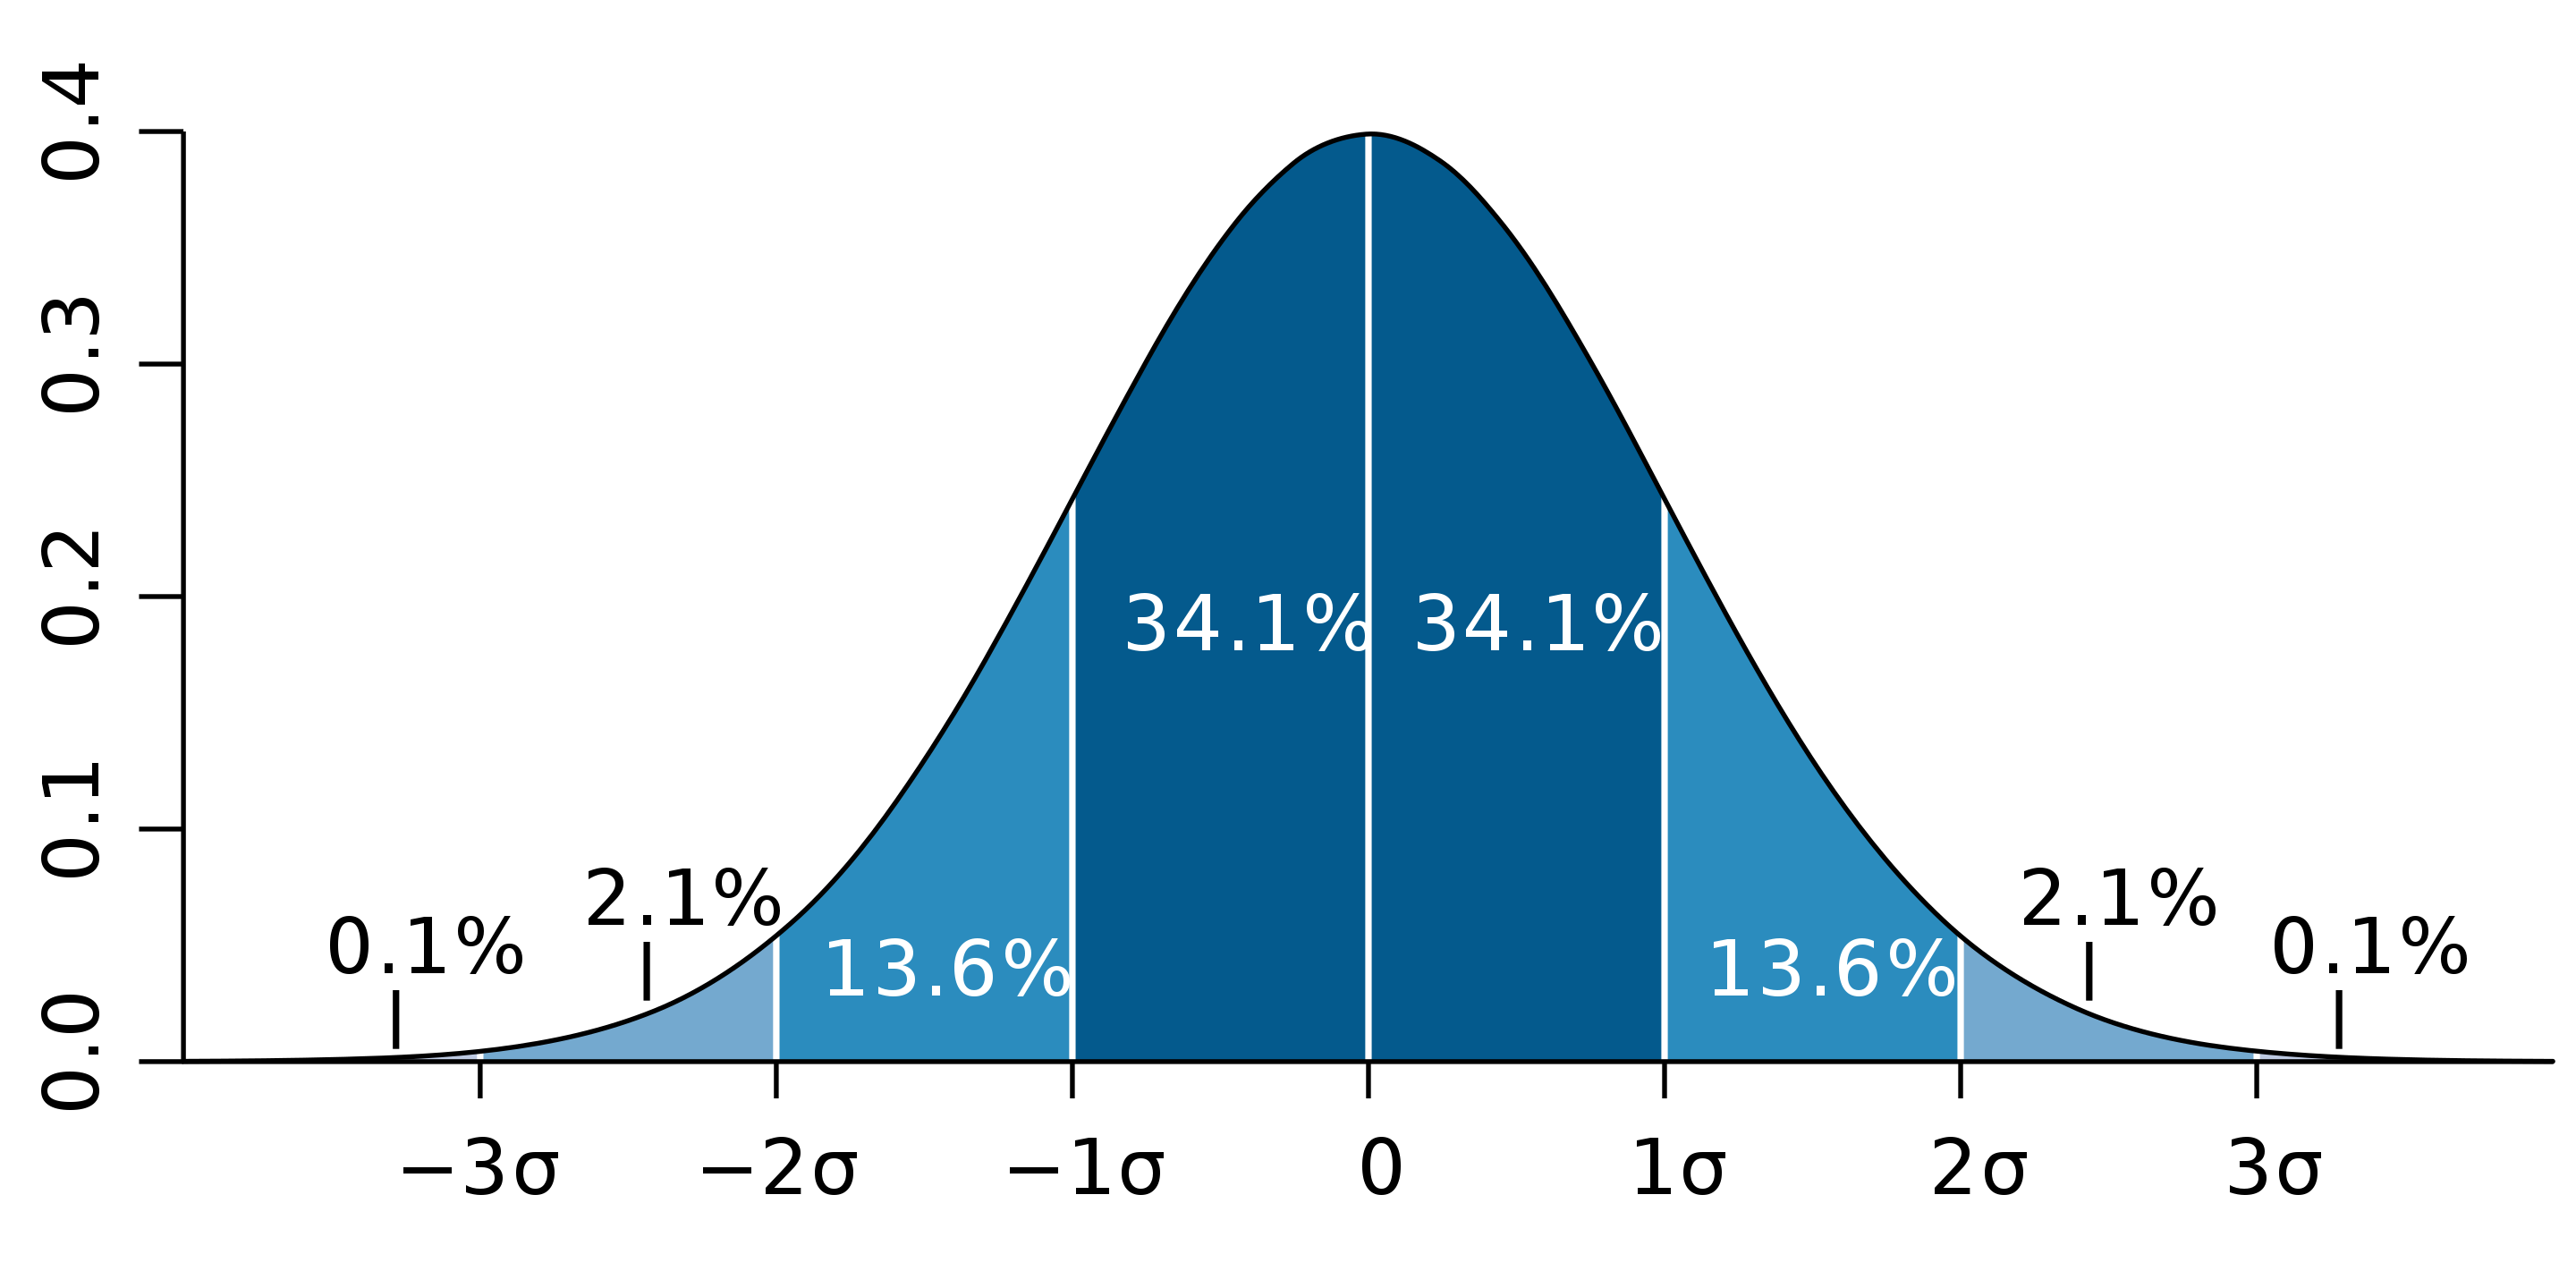

The curve that defines the normal distribution is

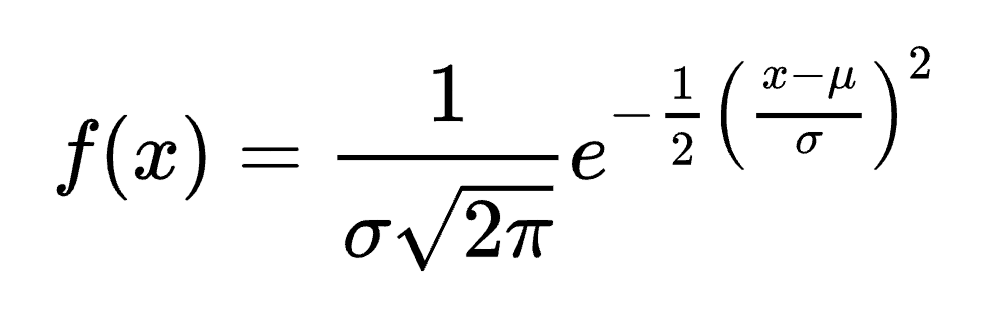

You can interpret this number as how likely it is that a certain number will be generated 
by a normal distribution.  (The function is a probability density function, which means we can't interpret
it to mean the actual probability that a *single* number will be generated by the distribution, but because
this isn't a course in probability, we'll fudge a little bit of the math for the moment and think of it that way).



## Back to anomaly detection

What we will assume is that there is a normal distribution for each of our features in our data,
and the features are being generated by these normal distributions.  So if we can determine the mean
and variance/standard deviation for each of the normal distributions that are generating our features,
we can determine how likely it is for certain values of those features to be "anomalous."

## Parameter estimation

The idea is that we will **estimate** the values of $\mu$ and $\sigma^2$ from our training data.

Assume we have only *one* feature in our training data: $\{ x^{(1)}, x^{(2)}, \ldots, x^{(m)}\}$.

So we could plot these values like this:

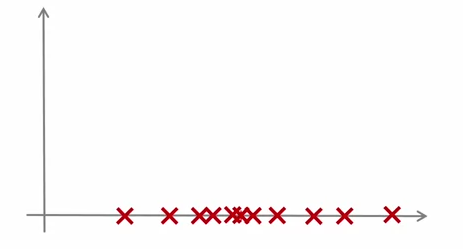

Now we want to figure out the *average* of the red x's and the *variance/standard deviation*.

Our estimate for $\mu$ is:

$\mu = \displaystyle \frac{1}{m} \sum_{i=1}^m  x^{(i)}$

Our estimate for $\sigma^2$ is:

$\sigma^2 = \displaystyle \frac{1}{m} \sum_{i=1}^m  \left( x^{(i)} - \mu \right)^2$

where $\mu$ is determined from above.  Technically, we're supposed to use $1/(m-1)$, but the difference
is so small it usually doesn't matter.

So this procedure gives us definitions of our two important parameters for a normal distribution.

We can now use these parameters to test if a certain feature value is "anomalous" or not.  We calculate
$f(x)$ for a new value of $x$, and if $f(x)$ is "too small," we will say it's anomalous.

## Multiple features

Let's extend this situation to multiple features.

Suppose our training data now has $n$ features (so each $x$ is now a vector).  In our semi-real-world example,
we used heat generated and vibration intensity of aircraft engines.

So instead of determining a single $\mu$ and $\sigma^2$ from our 1-dimensional training data, we will
now generate a collection of values: $\mu_1, \mu_2, \ldots, \mu_n$ and 
$\sigma^2_1, \sigma^2_2, \ldots, \sigma^2_n$.  There is one $\mu$ and one $\sigma^2$ per feature
in our data set.

We define $p(x)$ where $x$ is now a vector as:

$p(x) = f(x_1; \mu_1, \sigma^2_1) \cdot f(x_2; \mu_2, \sigma^2_2) \cdots f(x_n; \mu_n, \sigma^2_n)$.

Let's use our aircraft engine example.  Say we have our 2-dimensional data set where our features are
heat generated ($x_1$) and vibration intensity ($x_2$).  We find $\mu_1$ and $\mu_2$ and $\sigma^2_1$
and $\sigma^2_2$ for our two features, so we now have two functions $f(x)$ [but using different
values of $\mu$ and $\sigma^2$].  Sometimes we will write these functions using the notation above:

$f(x_1; \mu_1, \sigma^2_1)$ and $f(x_2; \mu_2, \sigma^2_2)$

Suppose a new aircraft engine rolls of the assembly line and we test it for how much heat and vibration
it generates, and we obtain $f(x_1) = 1/10$ and $f(x_2) = 1/20$.

Then the probability overall of these things happening together is $(1/10)(1/20) = 1/200$.

## Algorithm for anomaly detection

1. Choose $n$ features that you think might be indicative of anomalous situations.
2. Fit parameters $\mu_1, \mu_2, \ldots, \mu_n$ and $\sigma^2_1, \sigma^2_2, \ldots, \sigma^2_n$
3. Given a new example $x$, compute $p(x)$:

$p(x) = \displaystyle \prod_{j=1}^n f(x_j; \mu_j, \sigma^2_j)$

where each $f$ is defined as the normal distribution probability density function.

4. Report $x$ as anomalous if $p(x)<\varepsilon$.

## Choosing $\varepsilon$

So far we have dodged the question of figuring out how "small" the chance of a feature 
(or product of features) needs to be to report it as anomalous.  We often denote this threshold
as epsilon $\varepsilon$.

In practice, here's often how we can figure out what a good value of epsilon should be, since it's
difficult to determine it head of time just based on the mathematical equations above.

### Example

Suppose we have:

- 10,000 good aircraft engines (normal, not anomalous)
- 20 flawed engines (anomalous)

We will construct *three* different data sets:

- A training set of 6,000 good engines. (no anomalous engines included here)
- A validation set of 2,000 good engines and 10 anomalous engines.
- A test set of of 2,000 good engines and 10 anomalous engines.

Procedure:

- Use the training set to get parameters $\mu$'s and $\sigma^2$'s.
- Use the validation set to pick a good $\varepsilon$ (a value that hopefully reports the 10 anomalous engines as actually anomalous, and doesn't report any good engines as anomalous).
- Once you have a good value for epsilon, use the testing set to actually test.

Though we typically think of anomaly detection (at least this version) as unsupervised learning,
we can do much better at designing a model if we have just a little bit of labeled data.